# Support Vector Machine (SVM)

## Iris Dataset

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [2]:
X = iris.data[:, [2, 3]]
y = iris.target

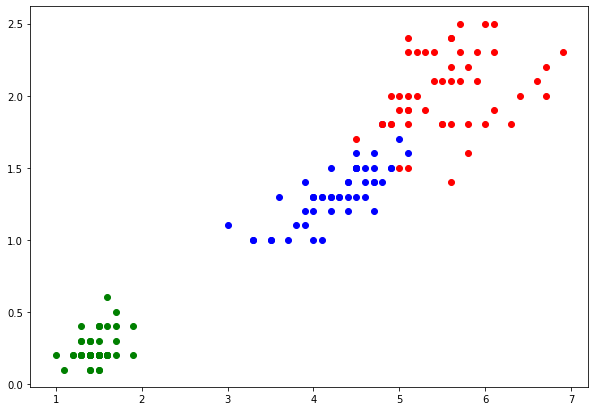

In [3]:
plt.figure(figsize=(10, 7))

for cl, c in zip(np.unique(y), ('green', 'blue', 'red')):
    plt.scatter(X[y==cl, 0], X[y==cl, 1], c=c)
plt.show()

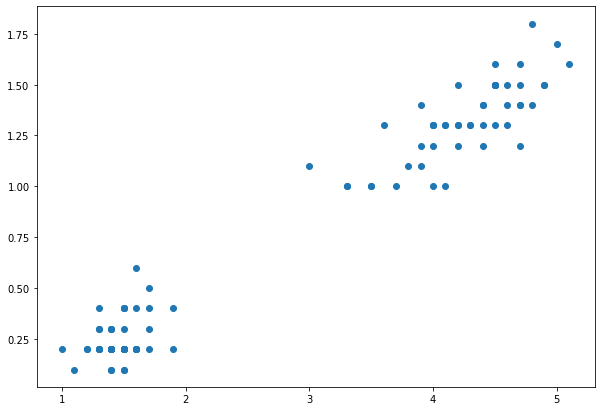

In [4]:
X = X[y != 2]
y = y[y != 2]


import matplotlib.pyplot as plt

plt.figure(figsize=(10 ,7))
plt.scatter(X[:, 0], X[:, 1])

In [5]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=10)
model.fit(X, y)

SVC(C=10, kernel='linear')

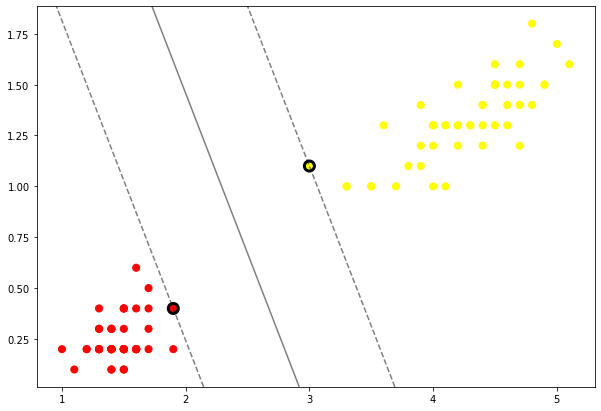

In [6]:
fig, ax = plt.subplots(figsize=(10 ,7))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

lin_x = np.linspace(xlim[0], xlim[1], 30)
lin_y = np.linspace(ylim[0], ylim[1], 30)

grid_Y, grid_X = np.meshgrid(lin_y, lin_x)

xy = np.vstack([grid_X.ravel(), grid_Y.ravel()]).T

Z = model.decision_function(xy).reshape(grid_X.shape)

ax.contour(grid_X, grid_Y, Z, 
           colors='k', 
           levels=[-1, 0, 1], 
           alpha=0.5,
           linestyles=['--', '-', '--']
          )

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
           s=100, linewidth=3, facecolors='none', edgecolors='k')
plt.show()

## Network ads dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [8]:
dataset = pd.read_csv('./data/Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Pipeline

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', SVC(kernel='linear', random_state=42, C=1))
    ]
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=1, kernel='linear', random_state=42))])

### Predicting the Test set results

In [12]:
y_pred = pipeline.predict(X_test)

### Confusion Matrix

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



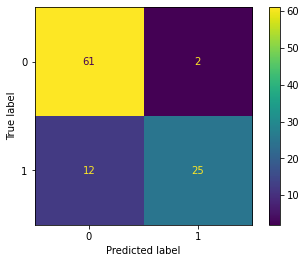

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [16]:
def plot_svm_margin(model, X_train, y_train, X_test, y_test, scaler=None):
    print(model)
    fig, (ax, ax_test) = plt.subplots(1, 2, figsize=(15 ,7))
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    lin_x = np.linspace(xlim[0], xlim[1], 100)
    lin_y = np.linspace(ylim[0], ylim[1], 100)

    grid_Y, grid_X = np.meshgrid(lin_y, lin_x)

    xy = np.vstack([grid_X.ravel(), grid_Y.ravel()]).T

    if scaler:
        xy = scaler.transform(xy)

    Z = model.decision_function(xy).reshape(grid_X.shape)

    ax.contour(grid_X, grid_Y, Z, 
               colors='k', 
               levels=[-1, 0, 1], 
               alpha=0.5,
               linestyles=['--', '-', '--']
              )

    sv = model.support_vectors_
    if scaler:
        sv = scaler.inverse_transform(sv)

    ax.scatter(sv[:, 0], sv[:, 1], 
               s=100, linewidth=3, facecolors='none', edgecolors='k')
    
    
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')

    ax.contour(grid_X, grid_Y, Z, 
               colors='k', 
               levels=[-1, 0, 1], 
               alpha=0.5,
               linestyles=['--', '-', '--']
              )

    ax_test.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
    ax_test.contour(grid_X, grid_Y, Z, 
               colors='k', 
               levels=[-1, 0, 1], 
               alpha=0.5,
               linestyles=['--', '-', '--']
              )
    
    plt.show()
    

SVC(C=10, gamma=25.0, random_state=42)


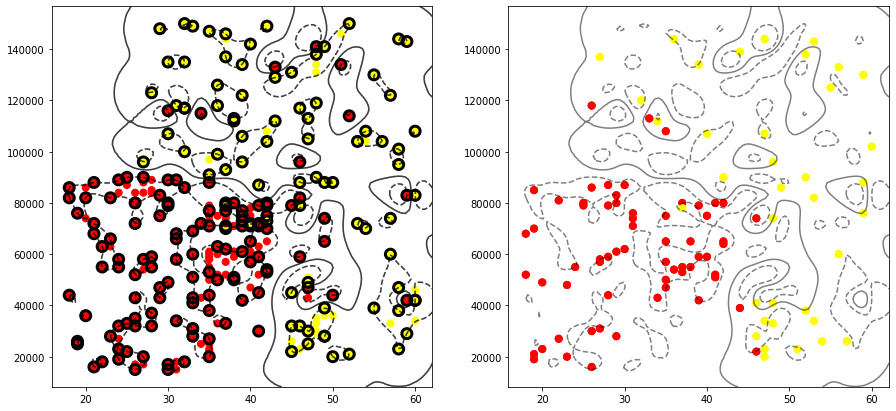

In [17]:
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', SVC(kernel='rbf', gamma=25., random_state=42, C=10))
    ]
)

pipeline.fit(X_train, y_train)

plot_svm_margin(model=pipeline['model'], 
                scaler=pipeline['scaler'],
               X_train=X_train,
               y_train=y_train,
               X_test=X_test,
               y_test=y_test)

> below cell create and write file `kernel_plot_function.pl`

> check in file if file has been created

In [19]:
%%writefile ./kernel_plot_function.py

import numpy as np
import matplotlib.pyplot as plt

def kernel_plot_svm_margin(model, X_train, y_train, X_test, y_test, scaler=None):
    print(model)
    fig, (ax, ax_test) = plt.subplots(1, 2, figsize=(15 ,7))
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    lin_x = np.linspace(xlim[0], xlim[1], 100)
    lin_y = np.linspace(ylim[0], ylim[1], 100)

    grid_Y, grid_X = np.meshgrid(lin_y, lin_x)

    xy = np.vstack([grid_X.ravel(), grid_Y.ravel()]).T

    if scaler:
        xy = scaler.transform(xy)

    Z = model.decision_function(xy).reshape(grid_X.shape)

    ax.contour(grid_X, grid_Y, Z, 
               colors='k', 
               levels=[-1, 0, 1], 
               alpha=0.5,
               linestyles=['--', '-', '--']
              )

    sv = model.support_vectors_
    if scaler:
        sv = scaler.inverse_transform(sv)

    ax.scatter(sv[:, 0], sv[:, 1], 
               s=100, linewidth=3, facecolors='none', edgecolors='k')
    
    
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')

    ax.contour(grid_X, grid_Y, Z, 
               colors='k', 
               levels=[-1, 0, 1], 
               alpha=0.5,
               linestyles=['--', '-', '--']
              )

    ax_test.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
    ax_test.contour(grid_X, grid_Y, Z, 
               colors='k', 
               levels=[-1, 0, 1], 
               alpha=0.5,
               linestyles=['--', '-', '--']
              )
    
    plt.show()

Writing ./kernel_plot_function.py


> After creating file we can inport it and use function

SVC(C=10, gamma=25.0, random_state=42)


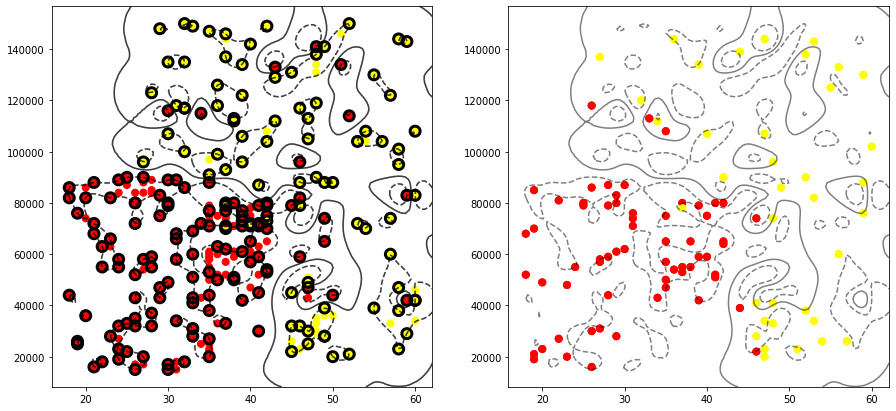

In [20]:
from kernel_plot_function import kernel_plot_svm_margin as plot_svm_fun

plot_svm_fun(model=pipeline['model'], 
                scaler=pipeline['scaler'],
               X_train=X_train,
               y_train=y_train,
               X_test=X_test,
               y_test=y_test)